<a href="https://colab.research.google.com/github/SebastienLiandrat/DS_CO2_PYC/blob/main/DataScientestProject2507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

## Importations de bibliothèques

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from scipy import stats
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV


from scipy.stats import pearsonr

In [59]:
import sklearn
print(sklearn.__version__)

1.2.2


## Importation data (Google Drive)

In [60]:
dossier = "Data/"
fichier = "data2021.csv"

dossier_local = "C:/Users/sebastien.liandrat/Box/Dossier Personnel de Sébastien LIANDRAT/Codes/Projet DataScientest/Dataset2/"

In [61]:
# Lien google drive et google colab
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [62]:
# Création du dataframe initial
df = pd.read_csv('/content/drive/MyDrive/' + dossier + fichier)
#df = pd.read_csv(dossier_local + fichier)
#df = df.sample(n = 500000)
df.describe()

<ipython-input-62-86535abdbfc9>:2: DtypeWarning: Columns (2,3,8,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/' + dossier + fichier)


,ID,MMS,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),ec (cm3),ep (KW),z (Wh/km),Ernedc (g/km),Erwltp (g/km),De,Vf,year,Fuel consumption,Electric range (km)
count,9.920108e+06,0.0,9920108.0,9.920076e+06,7.983251e+06,2.417634e+06,9.836149e+06,9.902924e+06,8.359068e+06,8.354696e+06,8.919498e+06,9.831028e+06,1.624164e+06,0.0,4.294992e+06,0.0,0.0,9920108.0,5.879436e+06,1.464499e+06
mean,4.709523e+07,NaN,1.0,1.489677e+03,1.616466e+03,4.914571e+01,1.147725e+02,2.656181e+03,1.551759e+03,1.554185e+03,1.526805e+03,1.027808e+02,1.716764e+02,NaN,1.512520e+00,NaN,NaN,2021.0,5.464067e+00,2.069794e+02
std,1.538232e+07,NaN,0.0,3.367757e+02,3.540105e+02,5.335402e+01,5.370556e+01,1.659442e+02,6.005264e+01,6.357808e+01,5.072671e+02,5.066461e+01,3.778168e+01,NaN,5.070900e-01,NaN,NaN,0.0,1.780356e+00,1.796692e+02
min,1.000000e+00,NaN,1.0,5.900000e+02,5.060000e+02,0.000000e+00,0.000000e+00,5.010000e+02,5.570000e+02,5.570000e+02,0.000000e+00,9.000000e+00,1.000000e+00,NaN,5.000000e-01,NaN,NaN,2021.0,1.000000e-01,1.000000e+00
25%,4.665304e+07,NaN,1.0,1.250000e+03,1.365000e+03,0.000000e+00,1.110000e+02,2.570000e+03,1.520000e+03,1.517000e+03,1.197000e+03,7.200000e+01,1.500000e+02,NaN,1.100000e+00,NaN,NaN,2021.0,4.700000e+00,5.600000e+01
50%,5.166623e+07,NaN,1.0,1.433000e+03,1.556000e+03,3.400000e+01,1.260000e+02,2.647000e+03,1.558000e+03,1.560000e+03,1.497000e+03,9.500000e+01,1.630000e+02,NaN,1.600000e+00,NaN,NaN,2021.0,5.300000e+00,7.500000e+01
75%,5.487999e+07,NaN,1.0,1.674000e+03,1.805000e+03,1.040000e+02,1.420000e+02,2.729000e+03,1.586000e+03,1.588000e+03,1.950000e+03,1.120000e+02,1.800000e+02,NaN,1.900000e+00,NaN,NaN,2021.0,6.000000e+00,3.870000e+02
max,1.496950e+08,NaN,1.0,4.610000e+03,4.272000e+03,4.520000e+02,5.720000e+02,5.840000e+03,3.200000e+03,3.800000e+03,7.993000e+03,1.506000e+03,2.756000e+03,NaN,6.300000e+00,NaN,NaN,2021.0,9.900000e+01,8.080000e+02


In [7]:
df = df.reset_index()

# 2.Sélection de variable

In [8]:
# Sélection des variables jugées pertinentes
# Suppression des autres variables (incluant Tan)

df_selected = df[['Country','Mp','T','Mk','Ct','m (kg)','Ewltp (g/km)','W (mm)','Ft','Fm','ep (KW)','Erwltp (g/km)','Fuel consumption ']]

df_selected

,Country,Mp,T,Mk,Ct,m (kg),Ewltp (g/km),W (mm),Ft,Fm,ep (KW),Erwltp (g/km),Fuel consumption
0,FR,VW-SAIC,AW,VOLKSWAGEN,M1,1163.0,121.0,2551.0,PETROL,M,70.0,NaN,NaN
1,FR,KIA,YB,KIA,M1,1225.0,119.0,2580.0,PETROL,H,88.0,NaN,5.2
2,NL,RENAULT-NISSAN-MITSUBISHI,DJF,DACIA,M1,1205.0,109.0,2600.0,LPG,B,74.0,NaN,NaN
3,DE,VW-SAIC,CDV,"VOLKSWAGEN, VW",M1,1447.0,120.0,2669.0,DIESEL,M,85.0,NaN,4.6
4,FR,RENAULT-NISSAN-MITSUBISHI,AH,RENAULT,M1,993.0,117.0,2492.0,PETROL,M,48.0,1.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,PT,KIA,YB,KIA,M1,1195.0,132.0,2580.0,PETROL,M,74.0,1.4,NaN
499996,LT,STELLANTIS,312,FIAT,M1,1055.0,115.0,2300.0,PETROL,H,52.0,NaN,NaN
499997,GR,STELLANTIS,J,DS,M1,1575.0,134.0,2738.0,DIESEL,M,96.0,0.7,NaN
499998,IT,MERCEDES-BENZ,F2B,MERCEDES-BENZ,M1,1485.0,150.0,2729.0,PETROL,M,120.0,1.2,5.7


# 3.Preprocesssing des données par variables

## Suppression de modalités

### Country

In [9]:
df_selected['Country'].value_counts(normalize = True)*100

DE    25.4788
FR    17.9986
IT    14.6580
ES     9.1540
PL     4.4352
BE     3.9036
NL     3.1512
SE     2.9584
AT     2.4414
CZ     2.0142
NO     1.8152
DK     1.8050
PT     1.4332
RO     1.2324
HU     1.1540
IE     1.0480
GR     1.0090
FI     0.9668
SK     0.7640
SI     0.5172
HR     0.4648
LU     0.3996
LT     0.3016
BG     0.2372
EE     0.2140
LV     0.1434
IS     0.1282
CY     0.1190
MT     0.0540
Name: Country, dtype: float64

In [10]:
## On pourrait envisager de rassembler des pays ensemble, notamment tous ceux inférieurs à 1% ou alors par région.
## Cette variable fait peut-être doublon avec celle sur les constructeurs (Mp notamment)

### Variable Mp

In [11]:
df_selected['Mp'].value_counts(normalize = True)*100

VW-SAIC                       25.870303
STELLANTIS                    22.314072
RENAULT-NISSAN-MITSUBISHI     13.617548
MAZDA-SUBARU-SUZUKI-TOYOTA     9.850108
BMW                            6.958294
MERCEDES-BENZ                  5.660666
HYUNDAI                        4.555027
FORD                           4.458722
KIA                            4.281407
TESLA                          2.433853
Name: Mp, dtype: float64

In [12]:
# Suppression des lignes TESLA
df_selected = df_selected[np.invert(df_selected['Mp'].isin(['TESLA']))]

### Variable 'T'

In [13]:
## A traiter plus tard, variable supprimée pour l'instant
df_selected['T'].value_counts().head(30)

U              32669
312            14700
CD             12424
RJA            10109
DJF             9564
M               8864
S               8563
A1              8227
RJB             7655
SR              6980
KJ              6633
5N              6632
NX              6493
AW              6058
C1              5885
F2B             5677
NW              5522
J2K             5336
X               4763
F2A             4234
AA              4110
F1X             4092
YB              4073
Z               4071
DFK             4067
3C              4016
E               3991
XPA1F(EU,M)     3985
KL              3944
F3              3938
Name: T, dtype: int64

In [14]:
df_selected.drop(columns = 'T', inplace = True)

<ipython-input-14-d50fa4750284>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns = 'T', inplace = True)


### Variable Mk

In [15]:
df_selected['Mk'].value_counts(normalize = True).head(20)*100

PEUGEOT           7.151168
RENAULT           6.910488
TOYOTA            6.259115
VOLKSWAGEN, VW    5.707087
BMW               5.463130
SKODA             4.901065
VOLKSWAGEN        4.853339
MERCEDES-BENZ     4.603851
AUDI              4.582958
CITROEN           4.455756
FORD              4.382220
HYUNDAI           4.240270
KIA               4.150143
FIAT              4.128226
DACIA             4.031544
OPEL              3.911307
SEAT              2.796600
VOLVO             2.415813
NISSAN            1.864195
SUZUKI            1.706268
Name: Mk, dtype: float64

In [16]:
# Variable non utilisée pour l'instant car trop de modalités et variable proche d'une autre
df_selected.drop(columns = 'Mk', inplace = True)

<ipython-input-16-e43990c719ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns = 'Mk', inplace = True)


### Variable Ct

In [17]:
df_selected['Ct'].value_counts()

M1     470977
M1G     16517
N1         16
N2          1
Name: Ct, dtype: int64

In [18]:
df_selected = df_selected[df_selected['Ct'].isin(['M1','M1G','N1'])]

### Variable Ft

In [19]:
df_selected['Ft'].value_counts(normalize = True)*100

PETROL             56.306742
DIESEL             22.907838
ELECTRIC            8.853357
PETROL/ELECTRIC     8.539517
LPG                 2.261287
DIESEL/ELECTRIC     0.591167
NG                  0.384402
NG-BIOMETHANE       0.080819
E85                 0.051896
UNKNOWN             0.019282
HYDROGEN            0.002461
petrol/electric     0.001231
Name: Ft, dtype: float64

In [20]:
df_selected['Ft'].replace("petrol/electric","PETROL/ELECTRIC", inplace = True)

In [21]:
#A faire  : regrouper les très faibles catégories ?

In [22]:
# Suppression des lignes UNKNOWN, ELECTRIC et HYDROGEN
df_selected = df_selected[np.invert(df_selected['Ft'].isin(['UNKNOWN','ELECTRIC','HYDROGEN']))]

### Variable Fm

In [23]:
df_selected['Fm'].value_counts()

M    301276
H     88597
P     43502
B     10689
F       179
Name: Fm, dtype: int64

In [24]:
# Pas de traitement sur cette variable

## Gestion des NA

In [25]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444243 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            444243 non-null  object 
 1   Mp                 430595 non-null  object 
 2   Ct                 444243 non-null  object 
 3   m (kg)             444242 non-null  float64
 4   Ewltp (g/km)       440780 non-null  float64
 5   W (mm)             443532 non-null  float64
 6   Ft                 444243 non-null  object 
 7   Fm                 444243 non-null  object 
 8   ep (KW)            442425 non-null  float64
 9   Erwltp (g/km)      215170 non-null  float64
 10  Fuel consumption   292973 non-null  float64
dtypes: float64(6), object(5)
memory usage: 40.7+ MB


In [26]:
df_selected["Erwltp (g/km)"].mean()

1.5161286424687457

### Variables quantitatives

In [27]:
# Pour la variable cible, suppression des lignes NA
df_selected = df_selected.dropna(subset = 'Ewltp (g/km)')

In [28]:
# On remplace les NA par la médiane

df_quanti = df_selected[['m (kg)','Ewltp (g/km)','W (mm)','ep (KW)','Erwltp (g/km)','Fuel consumption ']]
df_quanti = df_quanti.fillna(df_quanti.median())

df_quanti.isna().sum(axis=0)

m (kg)               0
Ewltp (g/km)         0
W (mm)               0
ep (KW)              0
Erwltp (g/km)        0
Fuel consumption     0
dtype: int64

In [29]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440780 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Country            440780 non-null  object 
 1   Mp                 427920 non-null  object 
 2   Ct                 440780 non-null  object 
 3   m (kg)             440780 non-null  float64
 4   Ewltp (g/km)       440780 non-null  float64
 5   W (mm)             440420 non-null  float64
 6   Ft                 440780 non-null  object 
 7   Fm                 440780 non-null  object 
 8   ep (KW)            438967 non-null  float64
 9   Erwltp (g/km)      215167 non-null  float64
 10  Fuel consumption   292930 non-null  float64
dtypes: float64(6), object(5)
memory usage: 40.4+ MB


### Variables qualitatives

In [30]:
# Sélection des variables qualitatives en vue d'éventuel pré-traitement additionnels
df_quali =df_selected[['Country','Mp','Ct','Ft','Fm']]

### Vérification du traitement des NA

In [31]:
df_quanti_quali = pd.concat([df_quanti, df_quali], axis = 1)
df_quanti_quali = df_quanti_quali.dropna()

print(df_quanti_quali.isna().sum(axis=0))

m (kg)               0
Ewltp (g/km)         0
W (mm)               0
ep (KW)              0
Erwltp (g/km)        0
Fuel consumption     0
Country              0
Mp                   0
Ct                   0
Ft                   0
Fm                   0
dtype: int64


In [32]:
df_quanti_quali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427920 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   m (kg)             427920 non-null  float64
 1   Ewltp (g/km)       427920 non-null  float64
 2   W (mm)             427920 non-null  float64
 3   ep (KW)            427920 non-null  float64
 4   Erwltp (g/km)      427920 non-null  float64
 5   Fuel consumption   427920 non-null  float64
 6   Country            427920 non-null  object 
 7   Mp                 427920 non-null  object 
 8   Ct                 427920 non-null  object 
 9   Ft                 427920 non-null  object 
 10  Fm                 427920 non-null  object 
dtypes: float64(6), object(5)
memory usage: 39.2+ MB


# 4.Preprocessing

## Isolation de la variable cible

In [33]:
target = df_quanti_quali['Ewltp (g/km)']
df_quanti_quali = df_quanti_quali.drop(columns = 'Ewltp (g/km)')
print("target :", len(target))
print("df_quanti_quali :", len(df_quanti_quali))

target : 427920
df_quanti_quali : 427920


## Variables quantitatives

In [34]:
df_quanti_prepross = df_quanti_quali.select_dtypes(include=['float64'])

L= df_quanti_prepross.columns

scaler = MinMaxScaler()

df_quanti_prepross =scaler.fit_transform(df_quanti_prepross)

df_quanti_prepross =pd.DataFrame(data=df_quanti_prepross,columns=L)

df_quanti_prepross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427920 entries, 0 to 427919
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   m (kg)             427920 non-null  float64
 1   W (mm)             427920 non-null  float64
 2   ep (KW)            427920 non-null  float64
 3   Erwltp (g/km)      427920 non-null  float64
 4   Fuel consumption   427920 non-null  float64
dtypes: float64(5)
memory usage: 16.3 MB


In [35]:


joblib.dump(scaler, '/content/drive/MyDrive/' + dossier + 'scaler.pkl')

['/content/drive/MyDrive/Data/scaler.pkl']

## Variables qualitatives

In [36]:
print("target :", len(target), target.isnull().sum())
print("df_quanti_quali :", len(df_quanti_quali),df_quanti_quali.isnull().sum())
print("df_quanti_prepross :", len(df_quanti_prepross),df_quanti_prepross.isnull().sum())

target : 427920 0
df_quanti_quali : 427920 m (kg)               0
W (mm)               0
ep (KW)              0
Erwltp (g/km)        0
Fuel consumption     0
Country              0
Mp                   0
Ct                   0
Ft                   0
Fm                   0
dtype: int64
df_quanti_prepross : 427920 m (kg)               0
W (mm)               0
ep (KW)              0
Erwltp (g/km)        0
Fuel consumption     0
dtype: int64


In [37]:
df_global= pd.concat([df_quanti_prepross,pd.get_dummies(df_quanti_quali.Ct, prefix='categorie').reset_index()],axis =1 )
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Fm, prefix='fuel_mode').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Country, prefix='Country').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Mp, prefix='Mp').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Ft, prefix='Ft').reset_index()], axis =1)

In [38]:
df_global.drop(columns = "index", inplace = True)

In [39]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427920 entries, 0 to 427919
Data columns (total 59 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   m (kg)                         427920 non-null  float64
 1   W (mm)                         427920 non-null  float64
 2   ep (KW)                        427920 non-null  float64
 3   Erwltp (g/km)                  427920 non-null  float64
 4   Fuel consumption               427920 non-null  float64
 5   categorie_M1                   427920 non-null  uint8  
 6   categorie_M1G                  427920 non-null  uint8  
 7   categorie_N1                   427920 non-null  uint8  
 8   fuel_mode_B                    427920 non-null  uint8  
 9   fuel_mode_F                    427920 non-null  uint8  
 10  fuel_mode_H                    427920 non-null  uint8  
 11  fuel_mode_M                    427920 non-null  uint8  
 12  fuel_mode_P                   

# 5.Étude des corrélations

## Corrélation entre les variables

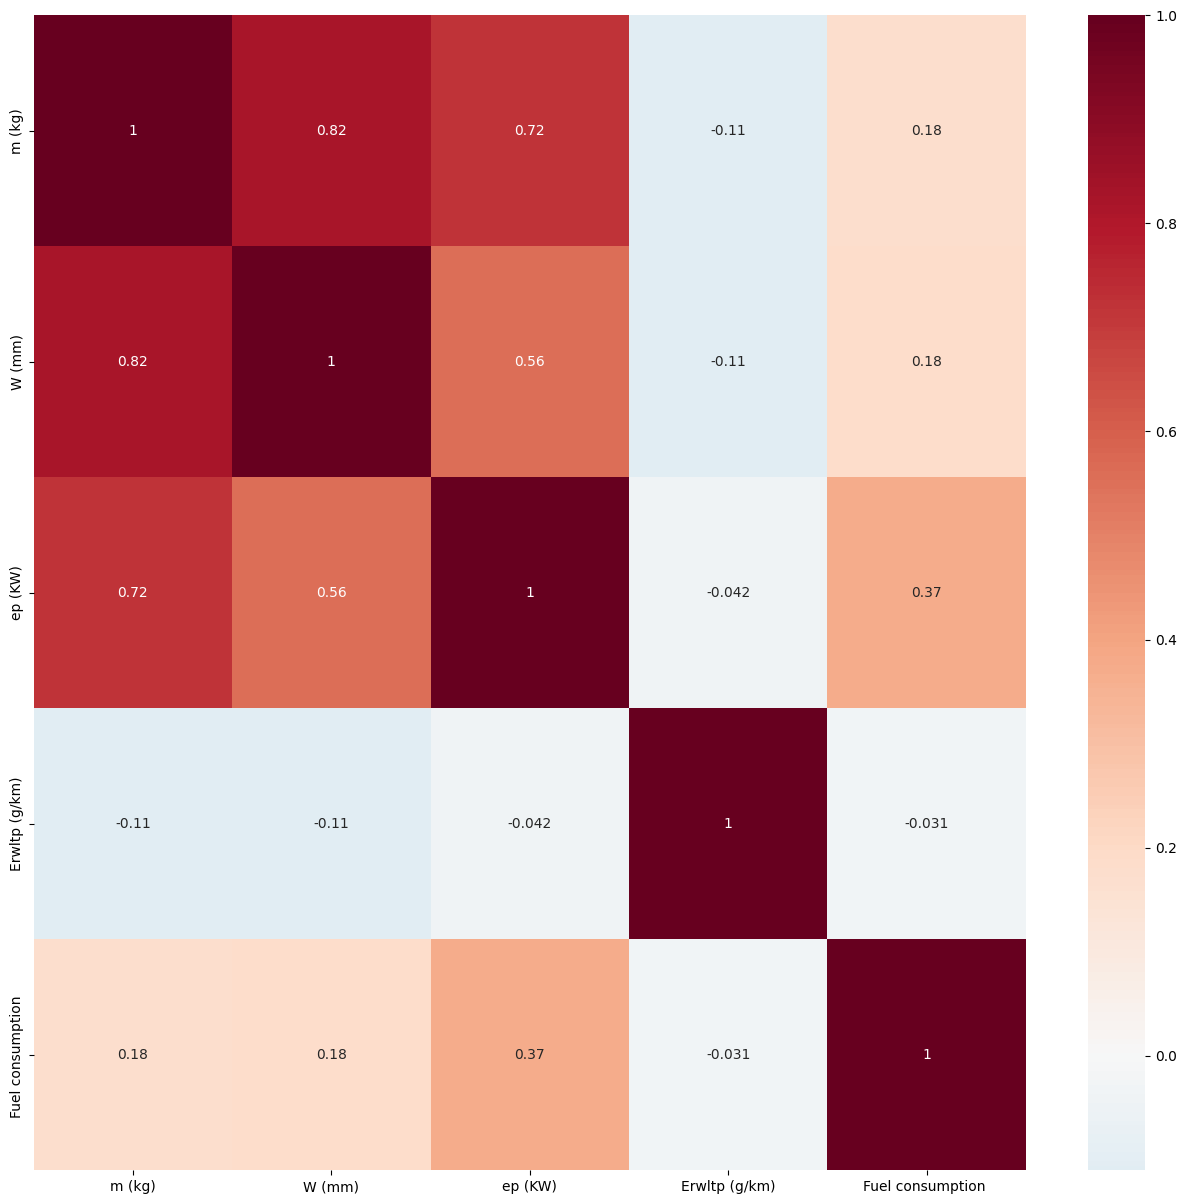

In [40]:
# Application heatmap, on ne prend que les variables quantitatives

plt.figure(figsize=(16, 15))

sns.heatmap(df_quanti_prepross.corr(), annot=True, cmap='RdBu_r', center=0);

# 6.Régression Random Forest

D'autres modèles de régression ont été testés mais ont donné de moins bons résultats que RandomForest. Ils sont en annexe.

### Sampling pour accélérer le traitement

In [41]:
print(len(df_global))
print(len(target))

427920
427920


In [42]:
df_final_X_y = pd.concat([df_global,target.reset_index()],axis =1)
df_final_X_y.drop(columns = "index", inplace = True)

In [43]:
df_final_X_y.isnull().sum()

m (kg)                           0
W (mm)                           0
ep (KW)                          0
Erwltp (g/km)                    0
Fuel consumption                 0
categorie_M1                     0
categorie_M1G                    0
categorie_N1                     0
fuel_mode_B                      0
fuel_mode_F                      0
fuel_mode_H                      0
fuel_mode_M                      0
fuel_mode_P                      0
Country_AT                       0
Country_BE                       0
Country_BG                       0
Country_CY                       0
Country_CZ                       0
Country_DE                       0
Country_DK                       0
Country_EE                       0
Country_ES                       0
Country_FI                       0
Country_FR                       0
Country_GR                       0
Country_HR                       0
Country_HU                       0
Country_IE                       0
Country_IS          

In [44]:
df_final_X_y.columns

Index(['m (kg)', 'W (mm)', 'ep (KW)', 'Erwltp (g/km)', 'Fuel consumption ',
       'categorie_M1', 'categorie_M1G', 'categorie_N1', 'fuel_mode_B',
       'fuel_mode_F', 'fuel_mode_H', 'fuel_mode_M', 'fuel_mode_P',
       'Country_AT', 'Country_BE', 'Country_BG', 'Country_CY', 'Country_CZ',
       'Country_DE', 'Country_DK', 'Country_EE', 'Country_ES', 'Country_FI',
       'Country_FR', 'Country_GR', 'Country_HR', 'Country_HU', 'Country_IE',
       'Country_IS', 'Country_IT', 'Country_LT', 'Country_LU', 'Country_LV',
       'Country_MT', 'Country_NL', 'Country_NO', 'Country_PL', 'Country_PT',
       'Country_RO', 'Country_SE', 'Country_SI', 'Country_SK', 'Mp_BMW',
       'Mp_FORD', 'Mp_HYUNDAI', 'Mp_KIA', 'Mp_MAZDA-SUBARU-SUZUKI-TOYOTA',
       'Mp_MERCEDES-BENZ', 'Mp_RENAULT-NISSAN-MITSUBISHI', 'Mp_STELLANTIS',
       'Mp_VW-SAIC', 'Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_LPG',
       'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC',
       'Ewltp (g/km)'],
      

In [45]:
df_reduit = df_final_X_y.sample(n = 100000)

"""
y = df_4['Ewltp (g/km)']
X = df_4.drop(columns = 'Ewltp (g/km)')
"""

y_reduit = df_reduit['Ewltp (g/km)']
X_reduit = df_reduit.drop(columns = 'Ewltp (g/km)',axis=1)

### Train test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_reduit, y_reduit,  test_size = 0.2)

In [47]:
X_reduit

,m (kg),W (mm),ep (KW),Erwltp (g/km),Fuel consumption,categorie_M1,categorie_M1G,categorie_N1,fuel_mode_B,fuel_mode_F,...,Mp_STELLANTIS,Mp_VW-SAIC,Ft_DIESEL,Ft_DIESEL/ELECTRIC,Ft_E85,Ft_LPG,Ft_NG,Ft_NG-BIOMETHANE,Ft_PETROL,Ft_PETROL/ELECTRIC
149701,0.074262,0.316016,0.031107,0.105263,0.055430,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
294580,0.252321,0.379550,0.068618,0.192982,0.053167,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
145374,0.030380,0.297816,0.035682,0.192982,0.053167,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
313800,0.202110,0.370285,0.068618,0.210526,0.036199,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
330917,0.333333,0.486433,0.073193,0.192982,0.050905,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235332,0.423207,0.388815,0.125343,0.192982,0.007919,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
54390,0.012658,0.277962,0.039341,0.192982,0.053167,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29254,0.206751,0.407015,0.078683,0.122807,0.053167,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
50175,0.375527,0.393779,0.219579,0.070175,0.096154,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
X_reduit.to_csv( '/content/drive/MyDrive/' + dossier + "X_reduit")
y_reduit.to_csv( '/content/drive/MyDrive/' + dossier + "y_reduit")

## Random Forest

In [49]:
RFregr = RandomForestRegressor()
RFregr.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
RFregr.score(X_test,y_test)

0.986985647649319

In [51]:
RFregr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
RFregr.predict(X_test)[0:10]

array([ 34.59989708, 124.13666667, 131.94237267, 117.        ,
       134.04043468,  30.9092684 , 145.        , 118.71124836,
       128.47      , 110.59506193])

In [53]:
y_test[0:10]

260399     33.0
181853    124.0
28157     132.0
304021    117.0
261379    134.0
19220      29.0
143059    145.0
177239    118.0
316286    126.0
374794    111.0
Name: Ewltp (g/km), dtype: float64

## Enregistrement modèle

In [ ]:
import joblib

#df = pd.read_csv('/content/drive/MyDrive/' + dossier + fichier)​


joblib.dump(RFregr, '/content/drive/MyDrive/' + dossier + 'RFregr_low.pkl')

['/content/drive/MyDrive/Data/RFregr.pkl']

In [ ]:
print(sklearn.__version__)

1.2.2


# 7.Étude de la feature importance / interprétabilité

## Feature importance

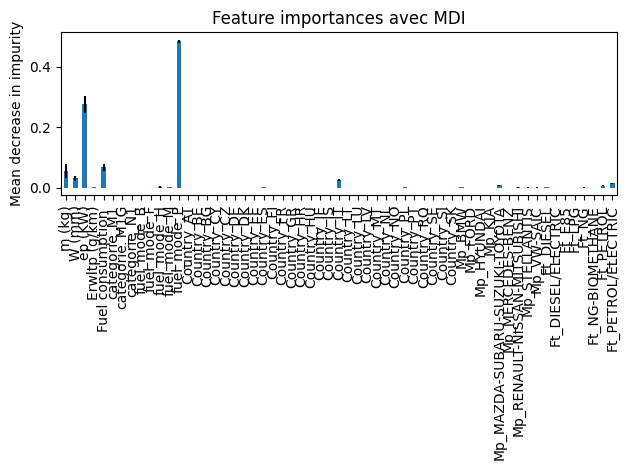

In [55]:
feature_names = [X_reduit.columns[i] for i in range(X_reduit.shape[1])]
importances = RFregr.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFregr.estimators_], axis=0)


forest_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances avec MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

fig.savefig('/content/drive/MyDrive/' + dossier + "feature_importance.jpeg")

In [ ]:
df_feature_importance = pd.DataFrame(RFregr.feature_importances_, index = df_final_X_y.columns[:-1], columns = ["importance"])
df_feature_importance.sort_values('importance', ascending = False).head(20)

,importance
fuel_mode_P,0.496660
ep (KW),0.269762
Fuel consumption,0.070231
m (kg),0.051236
W (mm),0.029719
Country_IT,0.023234
Ft_PETROL/ELECTRIC,0.015947
Mp_MAZDA-SUBARU-SUZUKI-TOYOTA,0.007525
Ft_PETROL,0.007498
Country_PL,0.003865


## Interprétabilité SHAP ?

In [ ]:
import shap

ModuleNotFoundError: ignored

In [ ]:
explainer = shap.Explainer(regr)

# Calculate the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_train.feature_names)

shap.summary_plot(shap_values, X_test)

In [ ]:
shap.dependence_plot("var1", shap_values, X_test, interaction_index= "var2")

# 8.Réduction du nombre de features suite à l'étude de l'interprétabilité

On repart de la base données df_quanti_quali pour faire de nouveaux pré-traitement

## Réduction du nombre de variable

In [ ]:
df_quanti_quali.columns

In [ ]:
# A faire : on se limite aux variables ep, m, W et fuel mode et on fait une vraie hyperoptimisation

In [ ]:
df_quanti_quali['Country'].value_counts(normalize = True)*100

In [ ]:
for element in df_quanti_quali["Country"].unique()[7:]:
   df_quanti_quali["Country"].replace(element, "Autres", inplace = True)

In [ ]:
df_quanti_quali["Country"].value_counts(normalize = True)

## Re-création du modèle RF

In [ ]:
df_quanti_prepross = df_quanti_quali.select_dtypes(include=['float64'])
L= df_quanti_prepross.columns
scaler = MinMaxScaler()
df_quanti_prepross =scaler.fit_transform(df_quanti_prepross)
df_quanti_prepross =pd.DataFrame(data=df_quanti_prepross,columns=L)
df_global= pd.concat([df_quanti_prepross,pd.get_dummies(df_quanti_quali.Ct, prefix='categorie').reset_index()],axis =1 )
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Fm, prefix='fuel_mode').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Country, prefix='Country').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Mp, prefix='Mp').reset_index()], axis =1)
df_global= pd.concat([df_global , pd.get_dummies(df_quanti_quali.Ft, prefix='Ft').reset_index()], axis =1)
df_global.drop(columns = "index", inplace = True)

df_final_X_y_2 = pd.concat([df_global,target.reset_index()],axis =1)
df_final_X_y_2.drop(columns = "index", inplace = True)

df_reduit_2 = df_final_X_y_2.sample(n = 10000)

"""
y = df_4['Ewltp (g/km)']
X = df_4.drop(columns = 'Ewltp (g/km)')
"""

y_reduit_2 = df_reduit_2['Ewltp (g/km)']
X_reduit_2 = df_reduit_2.drop(columns = 'Ewltp (g/km)',axis=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_reduit_2, y_reduit_2,  test_size = 0.2)



In [ ]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427386 entries, 0 to 427385
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   m (kg)                         427386 non-null  float64
 1   W (mm)                         427386 non-null  float64
 2   ep (KW)                        427386 non-null  float64
 3   Erwltp (g/km)                  427386 non-null  float64
 4   Fuel consumption               427386 non-null  float64
 5   categorie_M1                   427386 non-null  uint8  
 6   categorie_M1G                  427386 non-null  uint8  
 7   categorie_N1                   427386 non-null  uint8  
 8   fuel_mode_B                    427386 non-null  uint8  
 9   fuel_mode_F                    427386 non-null  uint8  
 10  fuel_mode_H                    427386 non-null  uint8  
 11  fuel_mode_M                    427386 non-null  uint8  
 12  fuel_mode_P                   

In [ ]:
RFregr_2 = RandomForestRegressor()
RFregr_2.fit(X_train_2, y_train_2)


RandomForestRegressor()

In [ ]:
RFregr_2.score(X_test_2,y_test_2)

0.9786540695590507

In [ ]:
RFregr_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Feature importance

In [ ]:
X_test_2.columns

Index(['m (kg)', 'W (mm)', 'ep (KW)', 'Erwltp (g/km)', 'Fuel consumption ',
       'categorie_M1', 'categorie_M1G', 'categorie_N1', 'fuel_mode_B',
       'fuel_mode_F', 'fuel_mode_H', 'fuel_mode_M', 'fuel_mode_P',
       'Country_AT', 'Country_Autres', 'Country_DE', 'Country_FI',
       'Country_FR', 'Country_HU', 'Country_IT', 'Country_NL', 'Mp_BMW',
       'Mp_FORD', 'Mp_HYUNDAI', 'Mp_KIA', 'Mp_MAZDA-SUBARU-SUZUKI-TOYOTA',
       'Mp_MERCEDES-BENZ', 'Mp_RENAULT-NISSAN-MITSUBISHI', 'Mp_STELLANTIS',
       'Mp_VW-SAIC', 'Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_LPG',
       'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC'],
      dtype='object')

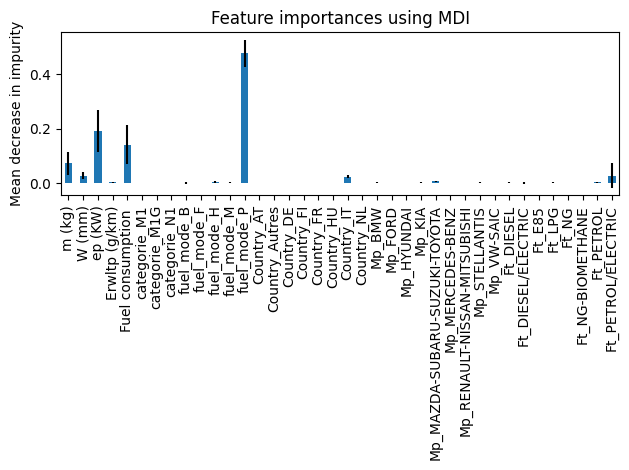

In [ ]:
feature_names_2 = [X_reduit_2.columns[i] for i in range(X_reduit_2.shape[1])]
importances_2 = RFregr_2.feature_importances_
std_2 = np.std([tree.feature_importances_ for tree in RFregr_2.estimators_], axis=0)


forest_importances_2 = pd.Series(importances_2, index=feature_names_2)

fig, ax = plt.subplots()
forest_importances_2.plot.bar(yerr=std_2, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
df_feature_importance_2 = pd.DataFrame(RFregr_2.feature_importances_, index = df_final_X_y_2.columns[:-1], columns = ["importance"])
df_feature_importance_2.sort_values('importance', ascending = False).head(20)

,importance
fuel_mode_P,0.478368
ep (KW),0.191911
Fuel consumption,0.141926
m (kg),0.072399
W (mm),0.027697
Ft_PETROL/ELECTRIC,0.027409
Country_IT,0.022970
Mp_MAZDA-SUBARU-SUZUKI-TOYOTA,0.005802
fuel_mode_H,0.004529
Ft_PETROL,0.003243


# 8. Hyperoptimisation

Hyperoptimisation faite sur le second modèle directement.
Premiers paramètres à faire varier d'après une rapide recherche bibliographique :
- n_estimators (par défault = 10)
- max_features (par défault = auto)

In [ ]:
forest_params = [{'n_estimators': [int(x) for x in np.linspace(start = 800, stop = 2000, num = 2)]
                  }]

In [ ]:

clf = GridSearchCV(RFregr_2, forest_params, cv = 3, verbose=10)

In [ ]:
clf.fit(X_train_2, y_train_2)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3; 1/2] START n_estimators=800............................................
[CV 1/3; 1/2] END .............n_estimators=800;, score=0.966 total time=  23.2s
[CV 2/3; 1/2] START n_estimators=800............................................
[CV 2/3; 1/2] END .............n_estimators=800;, score=0.963 total time=  22.0s
[CV 3/3; 1/2] START n_estimators=800............................................
[CV 3/3; 1/2] END .............n_estimators=800;, score=0.931 total time=  23.3s
[CV 1/3; 2/2] START n_estimators=2000...........................................
[CV 1/3; 2/2] END ............n_estimators=2000;, score=0.966 total time= 1.0min
[CV 2/3; 2/2] START n_estimators=2000...........................................
[CV 2/3; 2/2] END ............n_estimators=2000;, score=0.963 total time=  58.0s
[CV 3/3; 2/2] START n_estimators=2000...........................................
[CV 3/3; 2/2] END ............n_estimators=2000;, 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [800, 2000]}], verbose=10)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 2000}
0.9540475213319358


In [ ]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,57.719963,1.135155,1.502124,0.029347,2000,{'n_estimators': 2000},0.966306,0.962748,0.933088,0.954048,0.014892,1
0,22.263455,0.562887,0.573850,0.052760,800,{'n_estimators': 800},0.966206,0.962928,0.931363,0.953499,0.015710,2


In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

forest_params_2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = GridSearchCV(RFregr_2, forest_params_2, cv = 3, verbose=10)

NameError: ignored

In [ ]:
clf.fit(X_train_2, y_train_2)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
[CV 1/3; 1/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 1/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.951 total time=   3.2s
[CV 2/3; 1/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 1/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.942 total time=   4.7s
[CV 3/3; 1/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 1/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.916 total time=   3.2s
[CV 1/3; 2/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 2/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.950 total time=  13.9s
[CV 2/3; 2/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 2/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.943 total time=  11.2s
[CV 3/3; 2/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 2/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.917 total time=  10.3s
[CV 1/3; 3/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 3/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.950 total time=  20.5s
[CV 2/3; 3/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 3/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.943 total time=  18.8s
[CV 3/3; 3/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 3/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.916 total time=  18.8s
[CV 1/3; 4/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 4/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.950 total time=  27.2s
[CV 2/3; 4/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 4/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.943 total time=  27.5s
[CV 3/3; 4/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 4/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.917 total time=  27.6s
[CV 1/3; 5/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 5/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.950 total time=  34.4s
[CV 2/3; 5/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 5/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.943 total time=  37.5s
[CV 3/3; 5/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 5/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.917 total time=  33.8s
[CV 1/3; 6/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 6/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.949 total time=   3.9s
[CV 2/3; 6/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 6/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.943 total time=   3.8s
[CV 3/3; 6/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 6/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.913 total time=   3.0s
[CV 1/3; 7/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 7/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.948 total time=  11.4s
[CV 2/3; 7/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 7/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.942 total time=  10.5s
[CV 3/3; 7/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 7/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.917 total time=  10.7s
[CV 1/3; 8/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 8/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.949 total time=  19.2s
[CV 2/3; 8/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 8/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.942 total time=  19.9s
[CV 3/3; 8/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 8/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.916 total time=  18.3s
[CV 1/3; 9/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 9/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.949 total time=  26.8s
[CV 2/3; 9/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 9/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.942 total time=  26.4s
[CV 3/3; 9/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 9/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.915 total time=  26.6s
[CV 1/3; 10/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 10/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.949 total time=  35.2s
[CV 2/3; 10/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 10/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.942 total time=  34.7s
[CV 3/3; 10/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 10/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.916 total time=  34.2s
[CV 1/3; 11/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 11/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.948 total time=   3.0s
[CV 2/3; 11/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 11/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.941 total time=   3.0s
[CV 3/3; 11/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 11/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.914 total time=   4.5s
[CV 1/3; 12/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 12/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.947 total time=   9.8s
[CV 2/3; 12/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 12/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.941 total time=  11.5s
[CV 3/3; 12/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 12/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.914 total time=  11.4s
[CV 1/3; 13/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 13/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.947 total time=  18.3s
[CV 2/3; 13/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 13/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.941 total time=  18.7s
[CV 3/3; 13/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 13/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.914 total time=  19.9s
[CV 1/3; 14/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 14/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.947 total time=  26.7s
[CV 2/3; 14/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 14/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.941 total time=  25.1s
[CV 3/3; 14/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 14/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.914 total time=  27.9s
[CV 1/3; 15/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 15/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.948 total time=  34.4s
[CV 2/3; 15/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 15/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.941 total time=  32.7s
[CV 3/3; 15/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 15/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.915 total time=  33.5s
[CV 1/3; 16/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 16/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.948 total time=   3.8s
[CV 2/3; 16/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 16/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.941 total time=   3.8s
[CV 3/3; 16/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 16/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.914 total time=   3.1s
[CV 1/3; 17/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 17/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.948 total time=  11.2s
[CV 2/3; 17/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 17/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.942 total time=  10.2s
[CV 3/3; 17/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 17/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.916 total time=  10.9s
[CV 1/3; 18/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 18/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.948 total time=  18.8s
[CV 2/3; 18/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 18/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.942 total time=  18.7s
[CV 3/3; 18/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 18/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.916 total time=  17.9s
[CV 1/3; 19/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 19/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.948 total time=  26.4s
[CV 2/3; 19/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 19/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.942 total time=  27.2s
[CV 3/3; 19/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 19/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.916 total time=  26.3s
[CV 1/3; 20/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 20/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.948 total time=  34.1s
[CV 2/3; 20/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 20/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.942 total time=  33.1s
[CV 3/3; 20/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 20/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.916 total time=  32.9s
[CV 1/3; 21/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 21/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.947 total time=   4.4s
[CV 2/3; 21/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 21/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.942 total time=   3.0s
[CV 3/3; 21/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 21/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.917 total time=   3.0s
[CV 1/3; 22/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 22/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.948 total time=  11.3s
[CV 2/3; 22/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 22/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.941 total time=  11.2s
[CV 3/3; 22/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 22/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.917 total time=  11.4s
[CV 1/3; 23/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 23/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.947 total time=  18.8s
[CV 2/3; 23/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 23/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.941 total time=  17.9s
[CV 3/3; 23/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 23/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.916 total time=  18.0s
[CV 1/3; 24/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 24/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.947 total time=  26.2s
[CV 2/3; 24/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 24/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.941 total time=  27.9s
[CV 3/3; 24/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 24/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.917 total time=  26.0s
[CV 1/3; 25/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 25/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.947 total time=  32.9s
[CV 2/3; 25/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 25/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.941 total time=  32.7s
[CV 3/3; 25/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 25/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.916 total time=  34.1s
[CV 1/3; 26/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 26/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.947 total time=   3.1s
[CV 2/3; 26/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 26/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.940 total time=   2.9s
[CV 3/3; 26/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 26/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.916 total time=   3.0s
[CV 1/3; 27/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 27/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.946 total time=  11.0s
[CV 2/3; 27/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 27/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.940 total time=  11.2s
[CV 3/3; 27/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 27/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.916 total time=  10.3s
[CV 1/3; 28/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 28/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.946 total time=  18.4s
[CV 2/3; 28/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 28/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.941 total time=  17.6s
[CV 3/3; 28/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 28/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.916 total time=  17.6s
[CV 1/3; 29/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 29/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.947 total time=  27.1s
[CV 2/3; 29/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 29/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.940 total time=  25.8s
[CV 3/3; 29/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 29/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.916 total time=  25.8s
[CV 1/3; 30/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 30/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.946 total time=  32.4s
[CV 2/3; 30/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 30/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.941 total time=  32.2s
[CV 3/3; 30/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 30/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.915 total time=  32.6s
[CV 1/3; 31/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 31/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.946 total time=   4.0s
[CV 2/3; 31/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 31/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.940 total time=   2.9s
[CV 3/3; 31/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 31/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.910 total time=   2.9s
[CV 1/3; 32/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 32/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.945 total time=  10.9s
[CV 2/3; 32/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 32/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.940 total time=  10.8s
[CV 3/3; 32/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 32/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.913 total time=   9.7s
[CV 1/3; 33/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 33/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.946 total time=  18.6s
[CV 2/3; 33/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 33/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.940 total time=  18.0s
[CV 3/3; 33/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 33/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.912 total time=  17.7s
[CV 1/3; 34/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 34/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.945 total time=  27.1s
[CV 2/3; 34/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 34/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.940 total time=  25.6s
[CV 3/3; 34/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 34/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.911 total time=  24.4s
[CV 1/3; 35/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 35/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.945 total time=  33.6s
[CV 2/3; 35/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 35/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.940 total time=  32.0s
[CV 3/3; 35/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 35/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.911 total time=  32.1s
[CV 1/3; 36/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 36/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.945 total time=   3.2s
[CV 2/3; 36/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 36/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.940 total time=   4.2s
[CV 3/3; 36/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 36/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.911 total time=   2.9s
[CV 1/3; 37/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 37/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.945 total time=  10.9s
[CV 2/3; 37/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 37/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.940 total time=   9.5s
[CV 3/3; 37/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 37/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.911 total time=  11.0s
[CV 1/3; 38/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 38/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.945 total time=  17.4s
[CV 2/3; 38/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 38/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.940 total time=  18.7s
[CV 3/3; 38/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 38/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.910 total time=  19.8s
[CV 1/3; 39/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 39/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.945 total time=  25.8s
[CV 2/3; 39/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 39/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.940 total time=  24.7s
[CV 3/3; 39/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 39/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.911 total time=  25.5s
[CV 1/3; 40/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 40/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.945 total time=  33.3s
[CV 2/3; 40/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 40/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.940 total time=  33.3s
[CV 3/3; 40/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 40/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.911 total time=  32.3s
[CV 1/3; 41/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 41/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.945 total time=   2.9s
[CV 2/3; 41/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 41/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.939 total time=   4.1s
[CV 3/3; 41/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 41/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.909 total time=   3.4s
[CV 1/3; 42/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 42/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.945 total time=  10.5s
[CV 2/3; 42/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 42/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.939 total time=  10.2s
[CV 3/3; 42/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 42/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.910 total time=  11.0s
[CV 1/3; 43/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 43/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.945 total time=  17.5s
[CV 2/3; 43/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 43/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.940 total time=  20.4s
[CV 3/3; 43/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 43/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.910 total time=  17.6s
[CV 1/3; 44/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 44/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.945 total time=  25.3s
[CV 2/3; 44/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 44/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.940 total time=  24.5s
[CV 3/3; 44/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 44/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.911 total time=  25.6s
[CV 1/3; 45/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 45/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.945 total time=  32.2s
[CV 2/3; 45/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 45/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.939 total time=  33.5s
[CV 3/3; 45/1080] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 45/1080] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.910 total time=  32.5s
[CV 1/3; 46/1080] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 46/1080] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   0.9s
[CV 2/3; 46/1080] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 46/1080] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.932 total time=   0.9s
[CV 3/3; 46/1080] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 46/1080] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estim

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 91/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.966 total time=   5.1s
[CV 2/3; 91/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 91/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   6.2s
[CV 3/3; 91/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 91/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   5.4s
[CV 1/3; 92/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 92/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.966 total time=  18.0s
[CV 2/3; 92/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 92/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.963 total time=  18.6s
[CV 3/3; 92/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 92/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.934 total time=  18.7s
[CV 1/3; 93/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 93/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.966 total time=  32.7s
[CV 2/3; 93/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 93/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  30.7s
[CV 3/3; 93/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 93/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.932 total time=  30.5s
[CV 1/3; 94/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 94/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.966 total time=  44.5s
[CV 2/3; 94/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 94/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  43.7s
[CV 3/3; 94/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 94/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.932 total time=  43.4s
[CV 1/3; 95/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 95/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.966 total time=  58.9s
[CV 2/3; 95/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 95/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.963 total time=  55.9s
[CV 3/3; 95/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 95/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.933 total time=  56.9s
[CV 1/3; 96/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 96/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.965 total time=   6.2s
[CV 2/3; 96/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 96/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.961 total time=   4.7s
[CV 3/3; 96/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 96/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.931 total time=   4.7s
[CV 1/3; 97/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 97/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.965 total time=  17.9s
[CV 2/3; 97/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 97/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.962 total time=  17.0s
[CV 3/3; 97/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 97/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.931 total time=  16.7s
[CV 1/3; 98/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 98/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.965 total time=  28.8s
[CV 2/3; 98/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 98/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  30.3s
[CV 3/3; 98/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 98/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.931 total time=  28.5s
[CV 1/3; 99/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 99/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.965 total time=  40.2s
[CV 2/3; 99/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 99/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  39.7s
[CV 3/3; 99/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 99/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.932 total time=  40.7s
[CV 1/3; 100/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 100/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.964 total time=  53.0s
[CV 2/3; 100/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 100/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  53.5s
[CV 3/3; 100/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 100/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.932 total time=  51.2s
[CV 1/3; 101/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 101/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.962 total time=   4.5s
[CV 2/3; 101/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 101/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.959 total time=   5.7s
[CV 3/3; 101/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 101/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.930 total time=   4.2s
[CV 1/3; 102/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 102/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.963 total time=  15.3s
[CV 2/3; 102/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 102/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.960 total time=  15.2s
[CV 3/3; 102/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 102/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.932 total time=  15.2s
[CV 1/3; 103/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 103/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.963 total time=  26.5s
[CV 2/3; 103/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 103/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.959 total time=  26.3s
[CV 3/3; 103/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 103/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  26.1s
[CV 1/3; 104/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 104/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.963 total time=  36.1s
[CV 2/3; 104/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 104/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.960 total time=  38.4s
[CV 3/3; 104/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 104/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.930 total time=  36.1s
[CV 1/3; 105/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 105/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.963 total time=  47.1s
[CV 2/3; 105/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 105/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.959 total time=  47.9s
[CV 3/3; 105/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 105/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  46.6s
[CV 1/3; 106/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 106/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.962 total time=   4.6s
[CV 2/3; 106/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 106/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.960 total time=   6.0s
[CV 3/3; 106/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 106/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.930 total time=   4.6s
[CV 1/3; 107/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 107/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.963 total time=  16.4s
[CV 2/3; 107/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 107/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.960 total time=  16.4s
[CV 3/3; 107/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 107/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.932 total time=  18.2s
[CV 1/3; 108/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 108/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.962 total time=  27.8s
[CV 2/3; 108/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 108/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.960 total time=  27.7s
[CV 3/3; 108/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 108/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.933 total time=  27.9s
[CV 1/3; 109/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 109/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  39.6s
[CV 2/3; 109/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 109/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.960 total time=  39.3s
[CV 3/3; 109/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 109/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.933 total time=  37.6s
[CV 1/3; 110/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 110/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.962 total time=  52.9s
[CV 2/3; 110/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 110/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.960 total time=  49.2s
[CV 3/3; 110/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 110/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.933 total time=  50.7s
[CV 1/3; 111/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 111/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.962 total time=   4.4s
[CV 2/3; 111/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 111/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.959 total time=   5.5s
[CV 3/3; 111/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 111/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.933 total time=   4.8s
[CV 1/3; 112/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 112/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.962 total time=  15.8s
[CV 2/3; 112/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 112/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.960 total time=  15.7s
[CV 3/3; 112/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 112/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.931 total time=  15.6s
[CV 1/3; 113/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 113/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  27.2s
[CV 2/3; 113/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 113/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.960 total time=  26.9s
[CV 3/3; 113/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 113/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.932 total time=  28.5s
[CV 1/3; 114/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 114/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  37.1s
[CV 2/3; 114/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 114/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.960 total time=  38.5s
[CV 3/3; 114/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 114/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.933 total time=  37.2s
[CV 1/3; 115/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 115/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  49.4s
[CV 2/3; 115/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 115/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.960 total time=  48.0s
[CV 3/3; 115/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 115/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.932 total time=  50.1s
[CV 1/3; 116/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 116/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.959 total time=   4.8s
[CV 2/3; 116/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 116/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.958 total time=   4.0s
[CV 3/3; 116/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 116/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.929 total time=   4.4s
[CV 1/3; 117/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 117/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.960 total time=  14.8s
[CV 2/3; 117/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 117/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.958 total time=  14.7s
[CV 3/3; 117/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 117/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.931 total time=  14.6s
[CV 1/3; 118/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 118/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.960 total time=  24.9s
[CV 2/3; 118/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 118/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  25.1s
[CV 3/3; 118/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 118/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  25.1s
[CV 1/3; 119/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 119/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.961 total time=  34.4s
[CV 2/3; 119/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 119/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.958 total time=  34.5s
[CV 3/3; 119/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 119/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.930 total time=  36.8s
[CV 1/3; 120/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 120/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.960 total time=  45.3s
[CV 2/3; 120/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 120/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  44.5s
[CV 3/3; 120/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 120/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  44.6s
[CV 1/3; 121/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 121/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.958 total time=   4.0s
[CV 2/3; 121/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 121/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.955 total time=   5.3s
[CV 3/3; 121/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 121/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.925 total time=   3.9s
[CV 1/3; 122/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 122/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.958 total time=  14.3s
[CV 2/3; 122/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 122/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.956 total time=  14.1s
[CV 3/3; 122/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 122/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.925 total time=  14.2s
[CV 1/3; 123/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 123/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.958 total time=  24.6s
[CV 2/3; 123/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 123/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.956 total time=  24.5s
[CV 3/3; 123/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 123/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.925 total time=  24.4s
[CV 1/3; 124/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 124/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.958 total time=  33.8s
[CV 2/3; 124/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 124/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.956 total time=  34.3s
[CV 3/3; 124/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 124/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.925 total time=  33.2s
[CV 1/3; 125/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 125/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.958 total time=  43.7s
[CV 2/3; 125/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 125/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.956 total time=  43.2s
[CV 3/3; 125/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 125/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.925 total time=  45.2s
[CV 1/3; 126/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 126/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.958 total time=   5.0s
[CV 2/3; 126/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 126/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.956 total time=   4.4s
[CV 3/3; 126/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 126/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.925 total time=   3.9s
[CV 1/3; 127/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 127/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.958 total time=  14.3s
[CV 2/3; 127/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 127/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.956 total time=  14.1s
[CV 3/3; 127/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 127/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.925 total time=  14.2s
[CV 1/3; 128/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 128/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.957 total time=  25.1s
[CV 2/3; 128/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 128/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.956 total time=  23.0s
[CV 3/3; 128/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 128/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.925 total time=  24.2s
[CV 1/3; 129/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 129/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.958 total time=  33.6s
[CV 2/3; 129/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 129/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.956 total time=  34.5s
[CV 3/3; 129/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 129/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.924 total time=  34.0s
[CV 1/3; 130/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 130/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.958 total time=  44.7s
[CV 2/3; 130/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 130/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.956 total time=  43.4s
[CV 3/3; 130/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 130/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.925 total time=  43.5s
[CV 1/3; 131/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 131/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.957 total time=   5.4s
[CV 2/3; 131/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 131/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.954 total time=   3.8s
[CV 3/3; 131/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 131/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.924 total time=   3.8s
[CV 1/3; 132/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 132/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.957 total time=  14.1s
[CV 2/3; 132/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 132/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.955 total time=  13.8s
[CV 3/3; 132/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 132/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.925 total time=  14.0s
[CV 1/3; 133/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 133/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.957 total time=  24.1s
[CV 2/3; 133/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 133/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.955 total time=  22.4s
[CV 3/3; 133/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 133/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.924 total time=  25.6s
[CV 1/3; 134/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 134/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.957 total time=  32.9s
[CV 2/3; 134/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 134/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.955 total time=  33.8s
[CV 3/3; 134/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 134/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.925 total time=  33.0s
[CV 1/3; 135/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 135/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  43.0s
[CV 2/3; 135/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 135/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.955 total time=  42.6s
[CV 3/3; 135/1080] START bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 135/1080] END bootstrap=True, max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.924 total time=  43.2s
[CV 1/3; 136/1080] START bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 136/1080] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.960 total time=   2.6s
[CV 2/3; 136/1080] START bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 136/1080] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.960 total time=   1.8s
[CV 3/3; 136/1080] START bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 136/1080] END bootstrap=True, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 181/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.967 total time=   6.6s
[CV 2/3; 181/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 181/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   5.3s
[CV 3/3; 181/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 181/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.934 total time=   5.6s
[CV 1/3; 182/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 182/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.966 total time=  19.0s
[CV 2/3; 182/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 182/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.963 total time=  17.9s
[CV 3/3; 182/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 182/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.931 total time=  17.8s
[CV 1/3; 183/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 183/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.966 total time=  31.1s
[CV 2/3; 183/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 183/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  33.5s
[CV 3/3; 183/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 183/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.932 total time=  30.5s
[CV 1/3; 184/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 184/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.967 total time=  43.8s
[CV 2/3; 184/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 184/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  43.7s
[CV 3/3; 184/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 184/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.932 total time=  43.7s
[CV 1/3; 185/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 185/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.966 total time=  57.4s
[CV 2/3; 185/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 185/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.963 total time=  58.7s
[CV 3/3; 185/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 185/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.933 total time=  56.6s
[CV 1/3; 186/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 186/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.965 total time=   4.7s
[CV 2/3; 186/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 186/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.962 total time=   5.2s
[CV 3/3; 186/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 186/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.932 total time=   5.7s
[CV 1/3; 187/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 187/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.965 total time=  16.9s
[CV 2/3; 187/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 187/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.962 total time=  16.6s
[CV 3/3; 187/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 187/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.933 total time=  16.5s
[CV 1/3; 188/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 188/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.965 total time=  28.7s
[CV 2/3; 188/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 188/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  28.5s
[CV 3/3; 188/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 188/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.932 total time=  30.0s
[CV 1/3; 189/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 189/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.965 total time=  40.9s
[CV 2/3; 189/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 189/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  40.2s
[CV 3/3; 189/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 189/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.932 total time=  40.4s
[CV 1/3; 190/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 190/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.965 total time=  51.3s
[CV 2/3; 190/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 190/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  54.0s
[CV 3/3; 190/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 190/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.932 total time=  52.2s
[CV 1/3; 191/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 191/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.962 total time=   4.3s
[CV 2/3; 191/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 191/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.959 total time=   4.3s
[CV 3/3; 191/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 191/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.930 total time=   5.7s
[CV 1/3; 192/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 192/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.962 total time=  15.4s
[CV 2/3; 192/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 192/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.959 total time=  15.1s
[CV 3/3; 192/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 192/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.931 total time=  15.2s
[CV 1/3; 193/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 193/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.963 total time=  26.5s
[CV 2/3; 193/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 193/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.960 total time=  24.7s
[CV 3/3; 193/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 193/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  26.0s
[CV 1/3; 194/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 194/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.962 total time=  39.1s
[CV 2/3; 194/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 194/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.960 total time=  35.5s
[CV 3/3; 194/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 194/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.930 total time=  36.9s
[CV 1/3; 195/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 195/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.963 total time=  46.9s
[CV 2/3; 195/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 195/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.959 total time=  46.6s
[CV 3/3; 195/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 195/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  46.5s
[CV 1/3; 196/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 196/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.962 total time=   5.8s
[CV 2/3; 196/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 196/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.960 total time=   4.5s
[CV 3/3; 196/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 196/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.932 total time=   5.2s
[CV 1/3; 197/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 197/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.963 total time=  17.5s
[CV 2/3; 197/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 197/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.960 total time=  16.8s
[CV 3/3; 197/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 197/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.933 total time=  16.3s
[CV 1/3; 198/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 198/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  27.6s
[CV 2/3; 198/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 198/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.960 total time=  26.6s
[CV 3/3; 198/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 198/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.933 total time=  26.9s
[CV 1/3; 199/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 199/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  39.7s
[CV 2/3; 199/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 199/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.960 total time=  41.1s
[CV 3/3; 199/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 199/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.933 total time=  40.1s
[CV 1/3; 200/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 200/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.963 total time=  51.0s
[CV 2/3; 200/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 200/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.960 total time=  49.6s
[CV 3/3; 200/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 200/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.932 total time=  50.5s
[CV 1/3; 201/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 201/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.962 total time=   4.4s
[CV 2/3; 201/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 201/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.960 total time=   5.8s
[CV 3/3; 201/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 201/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.933 total time=   4.6s
[CV 1/3; 202/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 202/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.962 total time=  16.0s
[CV 2/3; 202/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 202/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.960 total time=  15.7s
[CV 3/3; 202/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 202/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.931 total time=  15.7s
[CV 1/3; 203/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 203/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  29.3s
[CV 2/3; 203/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 203/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.960 total time=  27.1s
[CV 3/3; 203/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 203/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.931 total time=  27.2s
[CV 1/3; 204/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 204/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  37.3s
[CV 2/3; 204/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 204/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.960 total time=  38.5s
[CV 3/3; 204/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 204/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.931 total time=  38.2s
[CV 1/3; 205/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 205/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  50.4s
[CV 2/3; 205/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 205/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.960 total time=  48.5s
[CV 3/3; 205/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 205/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.931 total time=  49.1s
[CV 1/3; 206/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 206/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.960 total time=   4.1s
[CV 2/3; 206/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 206/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.958 total time=   4.9s
[CV 3/3; 206/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 206/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.930 total time=   4.7s
[CV 1/3; 207/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 207/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.961 total time=  14.8s
[CV 2/3; 207/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 207/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.958 total time=  14.7s
[CV 3/3; 207/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 207/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.929 total time=  14.6s
[CV 1/3; 208/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 208/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.960 total time=  25.5s
[CV 2/3; 208/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 208/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  23.7s
[CV 3/3; 208/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 208/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.929 total time=  26.1s
[CV 1/3; 209/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 209/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.960 total time=  36.4s
[CV 2/3; 209/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 209/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.958 total time=  34.3s
[CV 3/3; 209/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 209/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.930 total time=  34.2s
[CV 1/3; 210/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 210/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.961 total time=  46.3s
[CV 2/3; 210/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 210/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  45.6s
[CV 3/3; 210/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 210/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.931 total time=  46.4s
[CV 1/3; 211/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 211/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.957 total time=   4.0s
[CV 2/3; 211/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 211/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.956 total time=   4.5s
[CV 3/3; 211/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 211/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.925 total time=   4.8s
[CV 1/3; 212/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 212/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.958 total time=  14.3s
[CV 2/3; 212/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 212/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.956 total time=  14.2s
[CV 3/3; 212/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 212/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.925 total time=  14.1s
[CV 1/3; 213/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 213/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.958 total time=  23.3s
[CV 2/3; 213/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 213/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.956 total time=  24.2s
[CV 3/3; 213/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 213/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.925 total time=  24.5s
[CV 1/3; 214/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 214/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.958 total time=  33.6s
[CV 2/3; 214/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 214/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.956 total time=  33.5s
[CV 3/3; 214/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 214/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.924 total time=  36.4s
[CV 1/3; 215/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 215/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.958 total time=  44.3s
[CV 2/3; 215/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 215/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.956 total time=  43.6s
[CV 3/3; 215/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 215/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.925 total time=  43.7s
[CV 1/3; 216/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 216/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.958 total time=   4.0s
[CV 2/3; 216/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 216/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.955 total time=   4.5s
[CV 3/3; 216/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 216/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.925 total time=   4.8s
[CV 1/3; 217/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 217/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.958 total time=  14.3s
[CV 2/3; 217/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 217/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.956 total time=  14.2s
[CV 3/3; 217/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 217/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.925 total time=  14.1s
[CV 1/3; 218/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 218/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.958 total time=  23.4s
[CV 2/3; 218/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 218/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.956 total time=  25.9s
[CV 3/3; 218/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 218/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.924 total time=  24.6s
[CV 1/3; 219/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 219/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.958 total time=  33.6s
[CV 2/3; 219/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 219/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.956 total time=  33.5s
[CV 3/3; 219/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 219/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.926 total time=  34.5s
[CV 1/3; 220/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 220/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.958 total time=  44.0s
[CV 2/3; 220/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 220/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.956 total time=  44.5s
[CV 3/3; 220/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 220/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.925 total time=  45.0s
[CV 1/3; 221/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 221/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.957 total time=   3.9s
[CV 2/3; 221/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 221/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.955 total time=   5.3s
[CV 3/3; 221/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 221/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.922 total time=   3.8s
[CV 1/3; 222/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 222/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.957 total time=  14.2s
[CV 2/3; 222/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 222/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.955 total time=  13.9s
[CV 3/3; 222/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 222/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.924 total time=  14.2s
[CV 1/3; 223/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 223/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.957 total time=  24.1s
[CV 2/3; 223/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 223/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.955 total time=  22.9s
[CV 3/3; 223/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 223/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.924 total time=  24.1s
[CV 1/3; 224/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 224/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.957 total time=  33.1s
[CV 2/3; 224/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 224/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.955 total time=  32.8s
[CV 3/3; 224/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 224/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.924 total time=  35.2s
[CV 1/3; 225/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 225/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.957 total time=  43.5s
[CV 2/3; 225/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 225/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.955 total time=  42.7s
[CV 3/3; 225/1080] START bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 225/1080] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.924 total time=  43.0s
[CV 1/3; 226/1080] START bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 226/1080] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.958 total time=   1.9s
[CV 2/3; 226/1080] START bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 226/1080] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.960 total time=   1.9s
[CV 3/3; 226/1080] START bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 226/1080] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 271/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.966 total time=   6.8s
[CV 2/3; 271/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 271/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   5.1s
[CV 3/3; 271/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 271/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.931 total time=   5.6s
[CV 1/3; 272/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 272/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.966 total time=  19.6s
[CV 2/3; 272/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 272/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.963 total time=  18.3s
[CV 3/3; 272/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 272/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.931 total time=  18.3s
[CV 1/3; 273/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 273/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.966 total time=  32.5s
[CV 2/3; 273/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 273/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  32.3s
[CV 3/3; 273/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 273/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.931 total time=  31.6s
[CV 1/3; 274/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 274/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.967 total time=  46.3s
[CV 2/3; 274/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 274/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  44.4s
[CV 3/3; 274/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 274/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.931 total time=  43.9s
[CV 1/3; 275/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 275/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.966 total time=  57.9s
[CV 2/3; 275/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 275/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.963 total time= 1.0min
[CV 3/3; 275/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 275/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.932 total time=  58.1s
[CV 1/3; 276/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 276/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.965 total time=   6.1s
[CV 2/3; 276/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 276/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.961 total time=   5.2s
[CV 3/3; 276/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 276/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.932 total time=   4.9s
[CV 1/3; 277/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 277/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.965 total time=  18.1s
[CV 2/3; 277/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 277/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.962 total time=  18.0s
[CV 3/3; 277/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 277/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.931 total time=  17.2s
[CV 1/3; 278/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 278/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.965 total time=  29.4s
[CV 2/3; 278/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 278/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  29.6s
[CV 3/3; 278/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 278/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.933 total time=  29.1s
[CV 1/3; 279/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 279/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.964 total time=  43.8s
[CV 2/3; 279/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 279/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  41.0s
[CV 3/3; 279/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 279/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.931 total time=  41.1s
[CV 1/3; 280/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 280/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.965 total time=  54.9s
[CV 2/3; 280/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 280/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  53.7s
[CV 3/3; 280/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 280/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.932 total time=  53.2s
[CV 1/3; 281/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 281/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.963 total time=   5.8s
[CV 2/3; 281/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 281/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.960 total time=   4.3s
[CV 3/3; 281/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 281/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.930 total time=   4.3s
[CV 1/3; 282/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 282/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.963 total time=  15.9s
[CV 2/3; 282/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 282/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.959 total time=  15.8s
[CV 3/3; 282/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 282/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.929 total time=  15.8s
[CV 1/3; 283/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 283/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.963 total time=  26.1s
[CV 2/3; 283/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 283/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.960 total time=  26.7s
[CV 3/3; 283/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 283/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  26.5s
[CV 1/3; 284/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 284/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.963 total time=  38.0s
[CV 2/3; 284/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 284/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.959 total time=  38.0s
[CV 3/3; 284/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 284/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.931 total time=  37.1s
[CV 1/3; 285/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 285/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.962 total time=  47.4s
[CV 2/3; 285/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 285/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.959 total time=  46.7s
[CV 3/3; 285/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 285/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  46.8s
[CV 1/3; 286/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 286/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.962 total time=   5.7s
[CV 2/3; 286/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 286/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.960 total time=   4.5s
[CV 3/3; 286/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 286/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.931 total time=   5.3s
[CV 1/3; 287/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 287/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.962 total time=  17.1s
[CV 2/3; 287/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 287/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.960 total time=  17.9s
[CV 3/3; 287/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 287/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.932 total time=  16.3s
[CV 1/3; 288/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 288/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  28.1s
[CV 2/3; 288/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 288/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.960 total time=  27.8s
[CV 3/3; 288/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 288/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.932 total time=  27.7s
[CV 1/3; 289/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 289/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.962 total time=  38.9s
[CV 2/3; 289/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 289/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.960 total time=  38.6s
[CV 3/3; 289/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 289/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.932 total time=  39.4s
[CV 1/3; 290/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 290/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.962 total time=  52.0s
[CV 2/3; 290/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 290/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.960 total time=  51.2s
[CV 3/3; 290/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 290/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.933 total time=  49.7s
[CV 1/3; 291/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 291/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.962 total time=   6.0s
[CV 2/3; 291/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 291/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.959 total time=   4.4s
[CV 3/3; 291/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 291/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.933 total time=   4.4s
[CV 1/3; 292/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 292/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.962 total time=  16.1s
[CV 2/3; 292/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 292/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.960 total time=  16.5s
[CV 3/3; 292/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 292/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.933 total time=  16.5s
[CV 1/3; 293/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 293/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  26.5s
[CV 2/3; 293/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 293/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.960 total time=  28.4s
[CV 3/3; 293/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 293/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.932 total time=  26.8s
[CV 1/3; 294/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 294/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  39.0s
[CV 2/3; 294/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 294/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.960 total time=  38.4s
[CV 3/3; 294/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 294/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.933 total time=  37.3s
[CV 1/3; 295/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 295/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  50.5s
[CV 2/3; 295/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 295/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.960 total time=  50.0s
[CV 3/3; 295/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 295/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.933 total time=  48.2s
[CV 1/3; 296/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 296/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.960 total time=   5.6s
[CV 2/3; 296/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 296/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.957 total time=   4.1s
[CV 3/3; 296/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 296/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.931 total time=   4.1s
[CV 1/3; 297/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 297/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.960 total time=  14.8s
[CV 2/3; 297/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 297/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.958 total time=  14.5s
[CV 3/3; 297/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 297/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.930 total time=  14.7s
[CV 1/3; 298/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 298/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.960 total time=  25.6s
[CV 2/3; 298/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 298/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  25.3s
[CV 3/3; 298/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 298/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  24.5s
[CV 1/3; 299/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 299/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.961 total time=  37.0s
[CV 2/3; 299/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 299/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.958 total time=  36.2s
[CV 3/3; 299/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 299/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.929 total time=  34.8s
[CV 1/3; 300/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 300/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.961 total time=  45.7s
[CV 2/3; 300/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 300/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  45.2s
[CV 3/3; 300/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 300/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  45.5s
[CV 1/3; 301/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 301/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.958 total time=   5.1s
[CV 2/3; 301/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 301/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.955 total time=   4.1s
[CV 3/3; 301/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 301/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.924 total time=   4.0s
[CV 1/3; 302/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 302/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.958 total time=  14.5s
[CV 2/3; 302/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 302/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.956 total time=  16.9s
[CV 3/3; 302/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 302/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.925 total time=  14.5s
[CV 1/3; 303/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 303/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.958 total time=  24.6s
[CV 2/3; 303/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 303/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.956 total time=  25.0s
[CV 3/3; 303/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 303/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.925 total time=  24.3s
[CV 1/3; 304/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 304/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.958 total time=  34.3s
[CV 2/3; 304/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 304/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.956 total time=  33.6s
[CV 3/3; 304/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 304/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.926 total time=  35.1s
[CV 1/3; 305/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 305/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.958 total time=  45.4s
[CV 2/3; 305/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 305/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.956 total time=  45.3s
[CV 3/3; 305/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 305/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.925 total time=  44.3s
[CV 1/3; 306/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 306/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.958 total time=   4.0s
[CV 2/3; 306/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 306/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.956 total time=   7.1s
[CV 3/3; 306/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 306/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.924 total time=   4.0s
[CV 1/3; 307/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 307/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.958 total time=  14.6s
[CV 2/3; 307/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 307/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.956 total time=  14.4s
[CV 3/3; 307/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 307/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.925 total time=  14.4s
[CV 1/3; 308/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 308/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.958 total time=  24.9s
[CV 2/3; 308/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 308/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.956 total time=  23.3s
[CV 3/3; 308/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 308/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.925 total time=  24.8s
[CV 1/3; 309/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 309/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.958 total time=  36.4s
[CV 2/3; 309/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 309/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.956 total time=  33.8s
[CV 3/3; 309/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 309/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.925 total time=  33.8s
[CV 1/3; 310/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 310/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.958 total time=  44.3s
[CV 2/3; 310/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 310/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.956 total time=  44.1s
[CV 3/3; 310/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 310/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.926 total time=  44.1s
[CV 1/3; 311/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 311/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.957 total time=   5.0s
[CV 2/3; 311/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 311/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.955 total time=   3.8s
[CV 3/3; 311/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 311/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.926 total time=   3.9s
[CV 1/3; 312/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 312/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.958 total time=  14.3s
[CV 2/3; 312/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 312/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.955 total time=  15.7s
[CV 3/3; 312/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 312/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.924 total time=  13.9s
[CV 1/3; 313/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 313/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  24.5s
[CV 2/3; 313/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 313/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.955 total time=  24.1s
[CV 3/3; 313/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 313/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.924 total time=  22.6s
[CV 1/3; 314/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 314/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.958 total time=  34.7s
[CV 2/3; 314/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 314/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.955 total time=  32.8s
[CV 3/3; 314/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 314/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.924 total time=  33.0s
[CV 1/3; 315/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 315/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  43.5s
[CV 2/3; 315/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 315/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.955 total time=  44.3s
[CV 3/3; 315/1080] START bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 315/1080] END bootstrap=True, max_depth=85, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.924 total time=  43.0s
[CV 1/3; 316/1080] START bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 316/1080] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.959 total time=   2.3s
[CV 2/3; 316/1080] START bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 316/1080] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.961 total time=   2.8s
[CV 3/3; 316/1080] START bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 316/1080] END bootstrap=True, max_depth=85, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 361/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.966 total time=   6.7s
[CV 2/3; 361/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 361/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.963 total time=   5.1s
[CV 3/3; 361/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 361/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.934 total time=   5.3s
[CV 1/3; 362/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 362/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.966 total time=  22.6s
[CV 2/3; 362/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 362/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.963 total time=  17.9s
[CV 3/3; 362/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 362/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=650;, score=0.934 total time=  18.3s
[CV 1/3; 363/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 363/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.966 total time=  32.4s
[CV 2/3; 363/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 363/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.963 total time=  32.5s
[CV 3/3; 363/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 363/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1100;, score=0.931 total time=  30.8s
[CV 1/3; 364/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 364/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.966 total time=  44.4s
[CV 2/3; 364/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 364/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  44.1s
[CV 3/3; 364/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 364/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1550;, score=0.933 total time=  43.7s
[CV 1/3; 365/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 365/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.966 total time=  57.2s
[CV 2/3; 365/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 365/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.963 total time=  58.4s
[CV 3/3; 365/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 365/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000;, score=0.931 total time=  56.5s
[CV 1/3; 366/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 366/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.964 total time=   5.7s
[CV 2/3; 366/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 366/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.962 total time=   5.4s
[CV 3/3; 366/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 366/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.932 total time=   4.7s
[CV 1/3; 367/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 367/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.964 total time=  17.4s
[CV 2/3; 367/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 367/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.962 total time=  17.9s
[CV 3/3; 367/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 367/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=650;, score=0.933 total time=  16.5s
[CV 1/3; 368/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 368/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.965 total time=  28.2s
[CV 2/3; 368/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 368/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  28.1s
[CV 3/3; 368/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 368/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1100;, score=0.931 total time=  28.0s
[CV 1/3; 369/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 369/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.965 total time=  40.9s
[CV 2/3; 369/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 369/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  39.3s
[CV 3/3; 369/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 369/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1550;, score=0.932 total time=  39.3s
[CV 1/3; 370/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 370/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.965 total time=  51.5s
[CV 2/3; 370/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 370/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  50.8s
[CV 3/3; 370/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 370/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000;, score=0.932 total time=  49.5s
[CV 1/3; 371/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 371/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.962 total time=   5.4s
[CV 2/3; 371/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 371/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.960 total time=   4.3s
[CV 3/3; 371/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 371/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.928 total time=   5.1s
[CV 1/3; 372/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 372/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.963 total time=  16.0s
[CV 2/3; 372/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 372/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.959 total time=  15.4s
[CV 3/3; 372/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 372/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=650;, score=0.930 total time=  14.7s
[CV 1/3; 373/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 373/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.962 total time=  25.9s
[CV 2/3; 373/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 373/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.959 total time=  24.8s
[CV 3/3; 373/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 373/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1100;, score=0.931 total time=  24.8s
[CV 1/3; 374/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 374/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.963 total time=  36.4s
[CV 2/3; 374/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 374/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.960 total time=  36.5s
[CV 3/3; 374/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 374/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1550;, score=0.931 total time=  37.6s
[CV 1/3; 375/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 375/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.963 total time=  47.4s
[CV 2/3; 375/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 375/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.959 total time=  46.0s
[CV 3/3; 375/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 375/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  45.7s
[CV 1/3; 376/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 376/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.961 total time=   4.6s
[CV 2/3; 376/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 376/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.960 total time=   5.7s
[CV 3/3; 376/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 376/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.932 total time=   4.5s
[CV 1/3; 377/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 377/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.962 total time=  15.9s
[CV 2/3; 377/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 377/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.960 total time=  16.0s
[CV 3/3; 377/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 377/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=650;, score=0.933 total time=  16.8s
[CV 1/3; 378/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 378/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.962 total time=  27.3s
[CV 2/3; 378/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 378/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.960 total time=  27.1s
[CV 3/3; 378/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 378/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1100;, score=0.931 total time=  27.1s
[CV 1/3; 379/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 379/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.963 total time=  40.2s
[CV 2/3; 379/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 379/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.960 total time=  37.9s
[CV 3/3; 379/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 379/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1550;, score=0.931 total time=  38.7s
[CV 1/3; 380/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 380/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.962 total time=  50.6s
[CV 2/3; 380/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 380/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.960 total time=  50.1s
[CV 3/3; 380/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 380/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000;, score=0.933 total time=  49.2s
[CV 1/3; 381/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 381/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.963 total time=   5.7s
[CV 2/3; 381/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 381/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.959 total time=   4.5s
[CV 3/3; 381/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 381/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.930 total time=   5.2s
[CV 1/3; 382/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 382/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.962 total time=  16.4s
[CV 2/3; 382/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 382/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.960 total time=  15.8s
[CV 3/3; 382/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 382/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=650;, score=0.933 total time=  16.9s
[CV 1/3; 383/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 383/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.962 total time=  27.1s
[CV 2/3; 383/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 383/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.960 total time=  26.8s
[CV 3/3; 383/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 383/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1100;, score=0.931 total time=  26.8s
[CV 1/3; 384/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 384/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.962 total time=  38.4s
[CV 2/3; 384/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 384/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.960 total time=  38.2s
[CV 3/3; 384/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 384/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1550;, score=0.931 total time=  37.7s
[CV 1/3; 385/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 385/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.962 total time=  48.3s
[CV 2/3; 385/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 385/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.960 total time=  50.5s
[CV 3/3; 385/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 385/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.933 total time=  48.3s
[CV 1/3; 386/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 386/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.961 total time=   4.4s
[CV 2/3; 386/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 386/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.958 total time=   4.1s
[CV 3/3; 386/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 386/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.930 total time=   5.3s
[CV 1/3; 387/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 387/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.960 total time=  14.5s
[CV 2/3; 387/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 387/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.958 total time=  14.3s
[CV 3/3; 387/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 387/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=650;, score=0.930 total time=  14.3s
[CV 1/3; 388/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 388/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.961 total time=  24.9s
[CV 2/3; 388/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 388/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  23.5s
[CV 3/3; 388/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 388/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100;, score=0.930 total time=  24.3s
[CV 1/3; 389/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 389/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.960 total time=  35.3s
[CV 2/3; 389/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 389/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.958 total time=  34.3s
[CV 3/3; 389/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 389/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1550;, score=0.930 total time=  34.8s
[CV 1/3; 390/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 390/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.960 total time=  46.1s
[CV 2/3; 390/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 390/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.958 total time=  44.9s
[CV 3/3; 390/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 390/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2000;, score=0.930 total time=  43.7s
[CV 1/3; 391/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 391/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.959 total time=   4.0s
[CV 2/3; 391/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 391/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.956 total time=   5.1s
[CV 3/3; 391/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 391/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.923 total time=   4.0s
[CV 1/3; 392/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 392/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.958 total time=  14.0s
[CV 2/3; 392/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 392/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.956 total time=  13.9s
[CV 3/3; 392/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 392/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=650;, score=0.925 total time=  14.1s
[CV 1/3; 393/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 393/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.958 total time=  24.1s
[CV 2/3; 393/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 393/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.956 total time=  23.9s
[CV 3/3; 393/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 393/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1100;, score=0.926 total time=  23.0s
[CV 1/3; 394/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 394/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.958 total time=  34.2s
[CV 2/3; 394/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 394/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.956 total time=  33.0s
[CV 3/3; 394/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 394/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1550;, score=0.926 total time=  35.3s
[CV 1/3; 395/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 395/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.958 total time=  43.4s
[CV 2/3; 395/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 395/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.956 total time=  42.8s
[CV 3/3; 395/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 395/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000;, score=0.925 total time=  44.2s
[CV 1/3; 396/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 396/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.957 total time=   4.0s
[CV 2/3; 396/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 396/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.956 total time=   3.9s
[CV 3/3; 396/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 396/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.925 total time=   5.1s
[CV 1/3; 397/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 397/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.958 total time=  14.2s
[CV 2/3; 397/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 397/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.956 total time=  13.9s
[CV 3/3; 397/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 397/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=650;, score=0.925 total time=  14.1s
[CV 1/3; 398/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 398/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.958 total time=  24.0s
[CV 2/3; 398/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 398/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.956 total time=  23.0s
[CV 3/3; 398/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 398/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1100;, score=0.925 total time=  24.4s
[CV 1/3; 399/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 399/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.958 total time=  34.3s
[CV 2/3; 399/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 399/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.956 total time=  32.9s
[CV 3/3; 399/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 399/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1550;, score=0.925 total time=  35.1s
[CV 1/3; 400/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 400/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.958 total time=  43.1s
[CV 2/3; 400/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 400/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.956 total time=  42.7s
[CV 3/3; 400/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 400/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=2000;, score=0.925 total time=  43.0s
[CV 1/3; 401/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 401/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.956 total time=   5.1s
[CV 2/3; 401/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 401/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.955 total time=   3.9s
[CV 3/3; 401/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 401/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.923 total time=   3.9s
[CV 1/3; 402/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 402/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.957 total time=  13.9s
[CV 2/3; 402/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 402/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.955 total time=  13.6s
[CV 3/3; 402/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 402/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=650;, score=0.925 total time=  13.7s
[CV 1/3; 403/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 403/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.958 total time=  23.9s
[CV 2/3; 403/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 403/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.955 total time=  23.6s
[CV 3/3; 403/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 403/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1100;, score=0.924 total time=  23.2s
[CV 1/3; 404/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 404/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.957 total time=  32.9s
[CV 2/3; 404/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 404/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.955 total time=  33.8s
[CV 3/3; 404/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 404/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1550;, score=0.924 total time=  32.6s
[CV 1/3; 405/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3; 405/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.957 total time=  42.3s
[CV 2/3; 405/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3; 405/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.955 total time=  41.9s
[CV 3/3; 405/1080] START bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3; 405/1080] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=2000;, score=0.924 total time=  41.9s
[CV 1/3; 406/1080] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/3; 406/1080] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.959 total time=   2.7s
[CV 2/3; 406/1080] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/3; 406/1080] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.961 total time=   2.2s
[CV 3/3; 406/1080] START bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/3; 406/1080] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_sp

In [ ]:
pprint(RFregr.get_params())

In [ ]:
# Création des listes de paramètres à tester

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 2)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators }

'''
 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
'''



"\n 'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\n"

In [ ]:
pprint(random_grid)

{'n_estimators': [200, 2000]}


In [ ]:
RF_gridCV = GridSearchCV(estimator = RFregr,
                               param_grid = random_grid,
                               cv = 3,
                               verbose=2,
                               n_jobs = -1)

In [ ]:
RF_gridCV.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: ignored

In [ ]:
RF_gridCV.best_params_

# Annexes

## GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
gbr.score(X_test,y_test)

0.9275439972653329

## Ridge

In [ ]:
ridge_reg = RidgeCV(alphas= (0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)

print('alpha sélectionné par c-v :', ridge_reg.alpha_)
print('score train :', ridge_reg.score(X_train, y_train))
print('score test :', ridge_reg.score(X_test, y_test))

ridge_pred_train = ridge_reg.predict(X_train)
ridge_pred_test = ridge_reg.predict(X_test)

#print('mse train :', mean_squared_error(ridge_pred_train, y_train))
#print('mse test :', mean_squared_error(ridge_pred_test, y_test))

alpha sélectionné par c-v : 0.7
score train : 0.8540408689156331
score test : 0.8298556012782298


## Lasso


In [ ]:
lasso_reg = Lasso(alpha=0.1)
# alpha = 1 testable aussi

lasso_reg.fit(X_train, y_train)

lasso_coef = lasso_reg.coef_
"""
plt.plot(range(len(data.columns)), lasso_coef)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70);
"""
lasso_pred_train = lasso_reg.predict(X_train)
lasso_pred_test = lasso_reg.predict(X_test)

"""
print('mse train :', mean_squared_error(lasso_pred_train, y_train))
print('mse test :', mean_squared_error(lasso_pred_test, y_test))
"""

lasso_reg.score(X_test,y_test)

0.8088551681564615

# Exploration données

## Vérification corrélation Pearson

In [ ]:
from scipy import stats
for column in X_test.columns:
    res = stats.pearsonr(X_test[column],y_test)
    print(res)

NameError: ignored

Index(['m (kg)', 'W (mm)', 'ep (KW)', 'Erwltp (g/km)', 'Fuel consumption ',
       'categorie_M1', 'categorie_M1G', 'categorie_N1', 'fuel_mode_B',
       'fuel_mode_F', 'fuel_mode_H', 'fuel_mode_M', 'fuel_mode_P',
       'Country_AT', 'Country_BE', 'Country_BG', 'Country_CY', 'Country_CZ',
       'Country_DE', 'Country_DK', 'Country_EE', 'Country_ES', 'Country_FI',
       'Country_FR', 'Country_GR', 'Country_HR', 'Country_HU', 'Country_IE',
       'Country_IS', 'Country_IT', 'Country_LT', 'Country_LU', 'Country_LV',
       'Country_MT', 'Country_NL', 'Country_NO', 'Country_PL', 'Country_PT',
       'Country_RO', 'Country_SE', 'Country_SI', 'Country_SK', 'Mp_BMW',
       'Mp_FORD', 'Mp_HYUNDAI', 'Mp_KIA', 'Mp_MAZDA-SUBARU-SUZUKI-TOYOTA',
       'Mp_MERCEDES-BENZ', 'Mp_RENAULT-NISSAN-MITSUBISHI', 'Mp_STELLANTIS',
       'Mp_VW-SAIC', 'Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_LPG',
       'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC',
       'Ewltp (g/km)'],
      

# Application modèle pour Streamlit

In [ ]:
df.to_csv('/content/drive/MyDrive/' + dossier + "data_500.csv")

In [ ]:
df.columns[0]

'index'

In [ ]:
df_test = df[(df["Country"] == "DE") &
   (df["Mp"] == "BMW") &
   (df["Ft"] == "DIESEL") &
   (df["Tan"] == "E1*2007/46*1750*12") &
   (df["Fuel consumption "] == 6.0) &
   (df["ID"] == 51715365)
            ]

target = df_test["Ewltp (g/km)"]
df_test = df_test[['Country','Mp','T','Mk','Ct','m (kg)','W (mm)','Ft','Fm','ep (KW)','Erwltp (g/km)','Fuel consumption ']]
df_test_quanti = scaler.transform(df_test.select_dtypes(include=['float64']))
df_test_quanti = pd.DataFrame(df_test_quanti, columns = ['m (kg)', 'W (mm)', 'ep (KW)', 'Erwltp (g/km)', 'Fuel consumption '])
df_test_quanti

df_global2= pd.concat([df_test_quanti,pd.get_dummies(df_test.Ct, prefix='categorie').reset_index()],axis =1 )
df_global2= pd.concat([df_global2 , pd.get_dummies(df_test.Fm, prefix='fuel_mode').reset_index()], axis =1)
df_global2= pd.concat([df_global2 , pd.get_dummies(df_test.Country, prefix='Country').reset_index()], axis =1)
df_global2= pd.concat([df_global2 , pd.get_dummies(df_test.Mp, prefix='Mp').reset_index()], axis =1)
df_global2= pd.concat([df_global2 , pd.get_dummies(df_test.Ft, prefix='Ft').reset_index()], axis =1)

df_global2 = df_global2.drop(columns = "index")


In [ ]:
a = pd.DataFrame(columns = df_final_X_y.drop(columns = "Ewltp (g/km)").columns)
a =pd.concat([a,df_global2]).fillna(0)
a.columns

Index(['m (kg)', 'W (mm)', 'ep (KW)', 'Erwltp (g/km)', 'Fuel consumption ',
       'categorie_M1', 'categorie_M1G', 'categorie_N1', 'fuel_mode_B',
       'fuel_mode_F', 'fuel_mode_H', 'fuel_mode_M', 'fuel_mode_P',
       'Country_AT', 'Country_BE', 'Country_BG', 'Country_CY', 'Country_CZ',
       'Country_DE', 'Country_DK', 'Country_EE', 'Country_ES', 'Country_FI',
       'Country_FR', 'Country_GR', 'Country_HR', 'Country_HU', 'Country_IE',
       'Country_IS', 'Country_IT', 'Country_LT', 'Country_LU', 'Country_LV',
       'Country_MT', 'Country_NL', 'Country_NO', 'Country_PL', 'Country_PT',
       'Country_RO', 'Country_SE', 'Country_SI', 'Country_SK', 'Mp_BMW',
       'Mp_FORD', 'Mp_HYUNDAI', 'Mp_KIA', 'Mp_MAZDA-SUBARU-SUZUKI-TOYOTA',
       'Mp_MERCEDES-BENZ', 'Mp_RENAULT-NISSAN-MITSUBISHI', 'Mp_STELLANTIS',
       'Mp_VW-SAIC', 'Ft_DIESEL', 'Ft_DIESEL/ELECTRIC', 'Ft_E85', 'Ft_LPG',
       'Ft_NG', 'Ft_NG-BIOMETHANE', 'Ft_PETROL', 'Ft_PETROL/ELECTRIC'],
      dtype='object')

In [ ]:
RFregr.predict(a)


array([155.33])

In [ ]:
target

14    156.0
Name: Ewltp (g/km), dtype: float64

In [ ]:
df_quanti_quali.loc[411]

m (kg)                        2015.0
W (mm)                        2815.0
ep (KW)                        132.0
Erwltp (g/km)                    1.6
Fuel consumption                 5.3
Country                           DE
Mp                               KIA
Ct                                M1
Ft                   PETROL/ELECTRIC
Fm                                 P
Name: 411, dtype: object